In [1]:
import sys
import os
import math
import copy
import time

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter
from sklearn.metrics import roc_auc_score
from scipy import fft
from data_loader import LoadDataset

from trainer import Trainer
from net import Net
from torchviz import make_dot
import pandas as pd
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
class EnergyError(Exception):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return repr(self.value)

In [3]:
ds_path = "/home/rauf/workspace/data/ESC-50"
batch_size = 20
esc_10 = True
if esc_10:
    n_classes = 10
else:
    n_classes = 50

trainloader = LoadDataset(ds_path, "train", esc10_only=esc_10)
dataloader_train = torch.utils.data.DataLoader(trainloader, batch_size,
                             shuffle=True,
                             pin_memory=False)
eval_loader = LoadDataset(ds_path, "test", esc10_only=esc_10)
dataloader_eval = torch.utils.data.DataLoader(eval_loader, batch_size,
                             shuffle=True,
                             pin_memory=False)

In [4]:
net = Net(5,8, n_classes)
net.cuda()

Net(
  (wavelet): Wavelet()
  (conv1): Conv1d(6, 10, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(10, 15, kernel_size=(3,), stride=(1,))
  (lastpool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Linear(in_features=15, out_features=120, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)

In [5]:
name = 'ESC50'
logdir = 'runs/' + name

In [10]:
trainer = Trainer(net, batch_size, logdir)

In [11]:
C = 0.01
lambda_reg = 0.003

Epochs 1/5: 100%|██████████| 16/16 [00:00, loss=2.31153, acc=0.10000]
                                                                                    

torch.Size([20, 10])
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5.]
[3. 5. 9. 8. 8. 3. 6. 1. 4. 8. 5. 6. 6. 4. 4. 1. 1. 2. 4. 7. 3. 8. 3. 4.
 0. 3. 0. 7. 5. 9. 8. 9. 6. 9. 2. 6. 3. 7. 5. 2. 7. 7. 8. 0. 2. 4. 0. 2.
 2. 5. 1. 6. 4. 1. 7. 2. 0. 3. 5. 9. 7. 8. 9. 6. 6. 0. 0. 5. 1. 5. 7. 9.
 8. 0. 1. 4. 9. 2. 1. 3.]
saving model with acc = 0.100000
train_loss = 2.311531, train_acc = 0.100000, wavelet_loss = 1.041
val_loss   = 2.313840, val_acc   = 0.100000


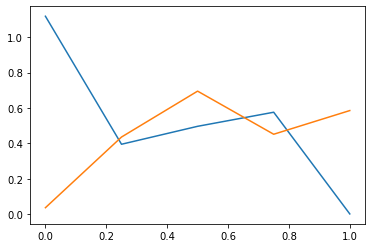

Epochs 2/5: 100%|██████████| 16/16 [00:00, loss=2.32401, acc=0.00000]
                                                                                    

torch.Size([20, 10])
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6.]
[3. 5. 2. 7. 5. 8. 5. 4. 9. 7. 6. 2. 7. 9. 1. 5. 5. 5. 3. 8. 7. 1. 9. 1.
 8. 4. 3. 2. 2. 7. 8. 9. 3. 0. 0. 4. 3. 8. 6. 7. 9. 4. 3. 2. 9. 1. 6. 4.
 1. 6. 7. 4. 4. 2. 9. 5. 1. 6. 3. 0. 9. 0. 2. 7. 0. 1. 0. 0. 2. 8. 0. 5.
 4. 1. 8. 6. 8. 6. 3. 6.]
train_loss = 2.324007, train_acc = 0.000000, wavelet_loss = 1.598
val_loss   = 2.320068, val_acc   = 0.100000


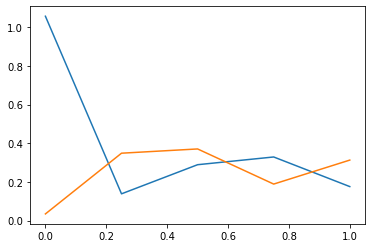

Epochs 3/5: 100%|██████████| 16/16 [00:00, loss=2.32458, acc=0.05000]
                                                                                    

torch.Size([20, 10])
[7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7.]
[8. 5. 5. 1. 0. 3. 6. 3. 9. 4. 4. 0. 7. 6. 3. 8. 2. 0. 2. 7. 5. 5. 3. 4.
 7. 2. 7. 6. 4. 1. 1. 7. 1. 6. 1. 4. 5. 2. 3. 9. 9. 5. 8. 6. 0. 0. 3. 2.
 1. 8. 2. 1. 4. 6. 4. 3. 3. 0. 9. 6. 8. 8. 6. 0. 4. 0. 2. 1. 9. 8. 5. 5.
 7. 7. 7. 2. 9. 9. 8. 9.]
train_loss = 2.324583, train_acc = 0.050000, wavelet_loss = 1.847
val_loss   = 2.319519, val_acc   = 0.100000


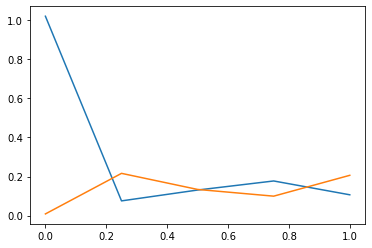

Epochs 4/5: 100%|██████████| 16/16 [00:00, loss=2.32218, acc=0.15000]
                                                                                    

torch.Size([20, 10])
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4.]
[8. 7. 2. 4. 4. 9. 5. 0. 8. 0. 2. 4. 1. 5. 4. 1. 0. 6. 7. 0. 3. 9. 8. 3.
 0. 5. 2. 9. 7. 6. 2. 7. 6. 0. 8. 3. 9. 3. 4. 8. 7. 5. 2. 4. 4. 9. 8. 6.
 9. 2. 5. 3. 0. 1. 6. 7. 9. 2. 5. 3. 6. 8. 5. 6. 6. 0. 2. 1. 3. 7. 1. 5.
 4. 1. 9. 8. 3. 1. 7. 1.]
train_loss = 2.322176, train_acc = 0.150000, wavelet_loss = 1.942
val_loss   = 2.322429, val_acc   = 0.100000


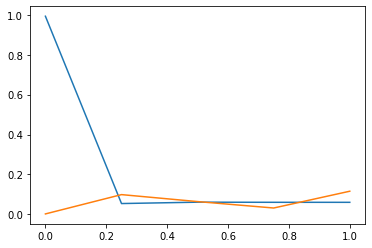

Epochs 5/5: 100%|██████████| 16/16 [00:00, loss=2.32206, acc=0.05000]
                                                                                    

torch.Size([20, 10])
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5.]
[0. 6. 1. 9. 9. 9. 6. 6. 3. 9. 8. 7. 9. 1. 4. 1. 4. 1. 2. 5. 5. 2. 7. 4.
 8. 0. 4. 0. 2. 8. 6. 2. 2. 7. 3. 7. 0. 8. 7. 8. 5. 6. 3. 4. 2. 8. 8. 9.
 3. 0. 1. 5. 3. 0. 4. 5. 7. 1. 6. 2. 8. 1. 2. 5. 5. 9. 6. 3. 3. 7. 4. 0.
 4. 1. 0. 3. 7. 9. 5. 6.]
train_loss = 2.322065, train_acc = 0.050000, wavelet_loss = 1.959
val_loss   = 2.321984, val_acc   = 0.100000


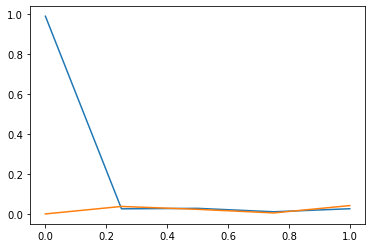

In [12]:
trainer.train(dataloader_train, dataloader_eval, 5, C, lambda_reg, lr=0.01)

In [6]:
optimizer = optim.SGD(net.parameters(), lr=0.05, momentum=0.95)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min', factor=0.7, patience=10, verbose=True, threshold=0.0001)

tensor([[ 4.3865e-08,  6.0852e-08,  8.4432e-08,  1.1714e-07,  1.6251e-07,
          4.5724e-05],
        [-2.1236e-08, -2.9670e-08, -4.0829e-08, -5.6987e-08, -7.8820e-08,
         -2.2153e-05],
        [-4.3251e-12, -1.7300e-11, -2.5950e-11, -1.1894e-11,  0.0000e+00,
         -2.9389e-09],
        [-2.8632e-08, -3.9790e-08, -5.5084e-08, -7.6398e-08, -1.0567e-07,
         -2.9810e-05],
        [ 7.9754e-09,  1.0899e-08,  1.5017e-08,  2.1037e-08,  2.8995e-08,
          8.2042e-06],
        [ 1.6846e-08,  2.3355e-08,  3.2369e-08,  4.5050e-08,  6.2592e-08,
          1.7551e-05],
        [ 1.1964e-07,  1.6601e-07,  2.3023e-07,  3.1943e-07,  4.4316e-07,
          1.2470e-04],
        [ 1.4093e-07,  1.9547e-07,  2.7123e-07,  3.7628e-07,  5.2196e-07,
          1.4687e-04],
        [ 6.7431e-07,  9.3552e-07,  1.2979e-06,  1.8007e-06,  2.4983e-06,
          7.0291e-04],
        [-4.1874e-07, -5.8093e-07, -8.0584e-07, -1.1181e-06, -1.5515e-06,
         -4.3651e-04],
        [-2.5932e-07, -3.5981e

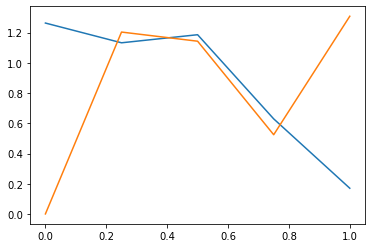

tensor([[-1.0928e-07, -1.3803e-07, -1.7425e-07, -2.1992e-07, -2.7788e-07,
          2.1646e-04],
        [-2.3918e-09, -3.0059e-09, -3.8082e-09, -4.7878e-09, -6.0378e-09,
          4.7259e-06],
        [-1.7179e-08, -2.1694e-08, -2.7473e-08, -3.4773e-08, -4.3760e-08,
          3.4115e-05],
        [-1.4005e-07, -1.7680e-07, -2.2331e-07, -2.8222e-07, -3.5621e-07,
          2.7741e-04],
        [ 2.0409e-09,  2.5675e-09,  3.2503e-09,  4.1023e-09,  5.1825e-09,
         -4.0376e-06],
        [ 2.7334e-09,  3.4254e-09,  4.3597e-09,  5.4669e-09,  6.9201e-09,
         -5.4248e-06],
        [-2.4324e-08, -3.0725e-08, -3.8752e-08, -4.9271e-08, -6.2004e-08,
          4.8189e-05],
        [-1.8162e-07, -2.2934e-07, -2.8959e-07, -3.6566e-07, -4.6172e-07,
          3.5977e-04],
        [ 8.4339e-10,  1.0207e-09,  1.4878e-09,  1.7300e-09,  2.1798e-09,
         -1.7204e-06],
        [ 1.3018e-07,  1.6439e-07,  2.0760e-07,  2.6213e-07,  3.3050e-07,
         -2.5784e-04],
        [-1.5190e-08, -1.9099e

tensor([[-1.2775e-06, -1.2382e-06, -1.1999e-06, -1.1629e-06, -1.1271e-06,
          6.6016e-05],
        [ 3.5114e-08,  3.4028e-08,  3.2983e-08,  3.1971e-08,  3.0985e-08,
         -1.8145e-06],
        [ 1.5221e-06,  1.4752e-06,  1.4297e-06,  1.3857e-06,  1.3430e-06,
         -7.8657e-05],
        [-3.8067e-08, -3.6910e-08, -3.5703e-08, -3.4687e-08, -3.3580e-08,
          1.9670e-06],
        [ 8.2172e-07,  7.9638e-07,  7.7184e-07,  7.4804e-07,  7.2499e-07,
         -4.2464e-05],
        [ 1.0452e-06,  1.0130e-06,  9.8176e-07,  9.5150e-07,  9.2216e-07,
         -5.4012e-05],
        [ 1.0981e-06,  1.0642e-06,  1.0313e-06,  9.9957e-07,  9.6881e-07,
         -5.6745e-05],
        [-1.7852e-09, -1.7365e-09, -1.6781e-09, -1.6305e-09, -1.5700e-09,
          9.2451e-08],
        [-2.0686e-06, -2.0049e-06, -1.9432e-06, -1.8833e-06, -1.8252e-06,
          1.0690e-04],
        [-1.3434e-07, -1.3017e-07, -1.2617e-07, -1.2225e-07, -1.1853e-07,
          6.9412e-06],
        [ 2.0229e-07,  1.9603e

tensor([[ 6.9690e-07,  5.9309e-07,  5.0471e-07,  4.2950e-07,  3.6551e-07,
         -1.3029e-05],
        [ 4.1011e-06,  3.4902e-06,  2.9702e-06,  2.5277e-06,  2.1509e-06,
         -7.6676e-05],
        [ 1.3530e-07,  1.1505e-07,  9.8110e-08,  8.3595e-08,  7.0931e-08,
         -2.5311e-06],
        [-3.2762e-09, -2.7702e-09, -2.3582e-09, -2.0198e-09, -1.7160e-09,
          6.1073e-08],
        [-2.3708e-07, -2.0165e-07, -1.7160e-07, -1.4619e-07, -1.2432e-07,
          4.4308e-06],
        [-2.8169e-06, -2.3971e-06, -2.0400e-06, -1.7360e-06, -1.4772e-06,
          5.2663e-05],
        [ 7.3612e-09,  6.2281e-09,  5.2939e-09,  4.5500e-09,  3.8342e-09,
         -1.3708e-07],
        [ 2.6985e-07,  2.2964e-07,  1.9553e-07,  1.6636e-07,  1.4158e-07,
         -5.0461e-06],
        [-4.1364e-07, -3.5199e-07, -2.9964e-07, -2.5491e-07, -2.1694e-07,
          7.7332e-06],
        [ 3.0153e-07,  2.5663e-07,  2.1814e-07,  1.8582e-07,  1.5812e-07,
         -5.6362e-06],
        [-2.9893e-07, -2.5448e

tensor([[-4.9392e-09, -5.1338e-09, -5.3566e-09, -5.5188e-09, -5.7047e-09,
          3.3160e-07],
        [-1.1613e-07, -1.2060e-07, -1.2525e-07, -1.3005e-07, -1.3506e-07,
          7.7974e-06],
        [ 7.5851e-08,  7.8742e-08,  8.1901e-08,  8.4914e-08,  8.8067e-08,
         -5.0927e-06],
        [ 3.5002e-07,  3.6329e-07,  3.7735e-07,  3.9185e-07,  4.0704e-07,
         -2.3491e-05],
        [ 2.1801e-07,  2.2632e-07,  2.3511e-07,  2.4407e-07,  2.5362e-07,
         -1.4635e-05],
        [-8.8320e-07, -9.1714e-07, -9.5231e-07, -9.8898e-07, -1.0271e-06,
          5.9300e-05],
        [-2.9085e-06, -3.0204e-06, -3.1365e-06, -3.2571e-06, -3.3824e-06,
          1.9528e-04],
        [ 2.7163e-07,  2.8200e-07,  2.9300e-07,  3.0414e-07,  3.1583e-07,
         -1.8236e-05],
        [-4.0017e-07, -4.1557e-07, -4.3155e-07, -4.4813e-07, -4.6537e-07,
          2.6868e-05],
        [ 2.1619e-08,  2.2477e-08,  2.3286e-08,  2.4220e-08,  2.5224e-08,
         -1.4519e-06],
        [-2.4333e-08, -2.5310e

tensor([[ 2.0140e-07,  2.7881e-07,  3.8559e-07,  5.3340e-07,  7.3796e-07,
         -1.9188e-04],
        [ 5.4520e-07,  7.5450e-07,  1.0441e-06,  1.4449e-06,  1.9992e-06,
         -5.1949e-04],
        [ 1.1295e-08,  1.5631e-08,  2.1634e-08,  2.9938e-08,  4.1438e-08,
         -1.0765e-05],
        [ 6.3035e-06,  8.7224e-06,  1.2069e-05,  1.6701e-05,  2.3110e-05,
         -6.0055e-03],
        [ 3.8035e-07,  5.2631e-07,  7.2827e-07,  1.0076e-06,  1.3943e-06,
         -3.6238e-04],
        [ 1.7764e-07,  2.4589e-07,  3.4040e-07,  4.7081e-07,  6.5161e-07,
         -1.6932e-04],
        [-4.5440e-09, -6.2892e-09, -8.7020e-09, -1.2026e-08, -1.6643e-08,
          4.3265e-06],
        [ 1.7300e-11, -4.3251e-12,  0.0000e+00,  1.4056e-11,  2.1625e-11,
         -2.9291e-09],
        [-3.3061e-08, -4.5655e-08, -6.3250e-08, -8.7401e-08, -1.2100e-07,
          3.1444e-05],
        [ 4.6336e-07,  6.4118e-07,  8.8723e-07,  1.2277e-06,  1.6988e-06,
         -4.4146e-04],
        [ 2.6772e-06,  3.7046e

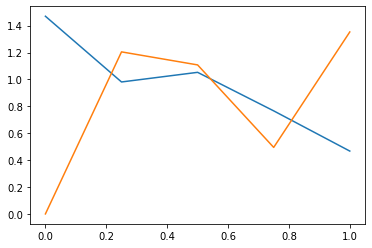

tensor([[ 6.7650e-08,  9.9411e-08,  1.4609e-07,  2.1468e-07,  3.1547e-07,
         -2.1066e-04],
        [ 3.4168e-10,  4.8441e-10,  6.9201e-10,  8.6501e-10,  1.6608e-09,
         -1.1763e-06],
        [ 2.0609e-09,  3.0427e-09,  4.4818e-09,  6.5654e-09,  9.6622e-09,
         -6.4507e-06],
        [ 1.8611e-08,  2.7334e-08,  4.0067e-08,  5.8821e-08,  8.6501e-08,
         -5.7760e-05],
        [ 7.1030e-08,  1.0442e-07,  1.5328e-07,  2.2532e-07,  3.3113e-07,
         -2.2108e-04],
        [ 6.5881e-07,  9.6812e-07,  1.4229e-06,  2.0906e-06,  3.0722e-06,
         -2.0514e-03],
        [ 3.7325e-09,  5.4323e-09,  8.0965e-09,  1.1695e-08,  1.7369e-08,
         -1.1581e-05],
        [ 7.4823e-08,  1.0996e-07,  1.6145e-07,  2.3750e-07,  3.4898e-07,
         -2.3301e-04],
        [ 7.5633e-07,  1.1114e-06,  1.6333e-06,  2.4002e-06,  3.5271e-06,
         -2.3550e-03],
        [ 1.3397e-08,  1.9721e-08,  2.8969e-08,  4.2589e-08,  6.2627e-08,
         -4.1803e-05],
        [-7.9252e-08, -1.1640e

tensor([[ 1.9199e-08,  3.2122e-08,  5.3648e-08,  8.9797e-08,  1.5024e-07,
          5.2190e-05],
        [-1.5785e-07, -2.6397e-07, -4.4150e-07, -7.3830e-07, -1.2345e-06,
         -4.2879e-04],
        [ 5.1793e-10,  8.6717e-10,  1.4489e-09,  2.4393e-09,  4.0699e-09,
          1.4144e-06],
        [-4.4982e-07, -7.5218e-07, -1.2579e-06, -2.1037e-06, -3.5181e-06,
         -1.2219e-03],
        [-5.1745e-08, -8.6588e-08, -1.4453e-07, -2.4196e-07, -4.0458e-07,
         -1.4053e-04],
        [-5.4461e-08, -9.0930e-08, -1.5224e-07, -2.5466e-07, -4.2579e-07,
         -1.4789e-04],
        [ 9.7443e-09,  1.6254e-08,  2.7265e-08,  4.5500e-08,  7.6190e-08,
          2.6488e-05],
        [ 4.4565e-07,  7.4512e-07,  1.2460e-06,  2.0844e-06,  3.4856e-06,
          1.2106e-03],
        [-1.3235e-08, -2.2421e-08, -3.7092e-08, -6.2281e-08, -1.0463e-07,
         -3.6204e-05],
        [ 1.1935e-07,  1.9944e-07,  3.3382e-07,  5.5845e-07,  9.3393e-07,
          3.2428e-04],
        [-1.0999e-07, -1.8401e

tensor([[-5.5266e-07, -9.6231e-07, -1.6758e-06, -2.9182e-06, -5.0806e-06,
         -1.5420e-03],
        [ 2.3282e-07,  4.0500e-07,  7.0395e-07,  1.2284e-06,  2.1371e-06,
          6.4851e-04],
        [ 3.8535e-07,  6.7104e-07,  1.1687e-06,  2.0346e-06,  3.5432e-06,
          1.0753e-03],
        [ 2.0725e-07,  3.6076e-07,  6.2848e-07,  1.0942e-06,  1.9055e-06,
          5.7823e-04],
        [-3.5668e-07, -6.2105e-07, -1.0815e-06, -1.8831e-06, -3.2789e-06,
         -9.9519e-04],
        [ 9.2778e-07,  1.6156e-06,  2.8131e-06,  4.8986e-06,  8.5300e-06,
          2.5887e-03],
        [-5.1209e-09, -8.9961e-09, -1.5501e-08, -2.7127e-08, -4.6918e-08,
         -1.4252e-05],
        [ 2.0685e-08,  3.6020e-08,  6.2722e-08,  1.0923e-07,  1.9021e-07,
          5.7719e-05],
        [ 1.9472e-07,  3.3896e-07,  5.9014e-07,  1.0278e-06,  1.7898e-06,
          5.4318e-04],
        [ 7.1904e-08,  1.2512e-07,  2.1786e-07,  3.7929e-07,  6.6063e-07,
          2.0049e-04],
        [ 1.6397e-07,  2.8551e

tensor([[ 2.1938e-07,  3.4753e-07,  5.5208e-07,  8.7470e-07,  1.3875e-06,
         -1.0134e-03],
        [-3.7641e-06, -5.9692e-06, -9.4658e-06, -1.5011e-05, -2.3804e-05,
          1.7388e-02],
        [-1.2666e-06, -2.0086e-06, -3.1852e-06, -5.0510e-06, -8.0102e-06,
          5.8508e-03],
        [ 3.3205e-07,  5.2657e-07,  8.3505e-07,  1.3243e-06,  2.0999e-06,
         -1.5339e-03],
        [ 3.5243e-08,  5.5867e-08,  8.8646e-08,  1.4051e-07,  2.2283e-07,
         -1.6277e-04],
        [ 2.5106e-07,  3.9814e-07,  6.3137e-07,  1.0012e-06,  1.5877e-06,
         -1.1597e-03],
        [-3.4592e-08, -5.4798e-08, -8.6674e-08, -1.3781e-07, -2.1861e-07,
          1.5972e-04],
        [-5.0614e-09, -8.0100e-09, -1.2746e-08, -2.0176e-08, -3.1997e-08,
          2.3384e-05],
        [ 1.3342e-07,  2.1158e-07,  3.3549e-07,  5.3209e-07,  8.4389e-07,
         -6.1635e-04],
        [-3.6977e-08, -5.8687e-08, -9.3060e-08, -1.4755e-07, -2.3400e-07,
          1.7091e-04],
        [-3.3580e-08, -5.3337e

tensor([[-3.6754e-06, -4.9391e-06, -6.6375e-06, -8.9198e-06, -1.1987e-05,
          1.2946e-03],
        [ 1.2662e-07,  1.7021e-07,  2.2871e-07,  3.0733e-07,  4.1303e-07,
         -4.4609e-05],
        [ 1.0828e-06,  1.4551e-06,  1.9554e-06,  2.6277e-06,  3.5313e-06,
         -3.8139e-04],
        [ 5.4478e-07,  7.3190e-07,  9.8277e-07,  1.3217e-06,  1.7762e-06,
         -1.9185e-04],
        [-4.8127e-09, -6.4681e-09, -8.7171e-09, -1.1712e-08, -1.5722e-08,
          1.6972e-06],
        [-8.9442e-09, -1.2119e-08, -1.6219e-08, -2.1729e-08, -2.9237e-08,
          3.1589e-06],
        [ 2.4958e-07,  3.3539e-07,  4.5072e-07,  6.0570e-07,  8.1398e-07,
         -8.7912e-05],
        [-2.5257e-06, -3.3941e-06, -4.5610e-06, -6.1295e-06, -8.2372e-06,
          8.8964e-04],
        [-9.8680e-08, -1.3231e-07, -1.7757e-07, -2.3819e-07, -3.2109e-07,
          3.4648e-05],
        [ 4.8198e-07,  6.4782e-07,  8.7032e-07,  1.1696e-06,  1.5718e-06,
         -1.6976e-04],
        [-8.2723e-08, -1.1104e

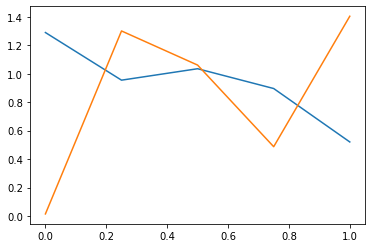

tensor([[-7.5662e-08, -9.7573e-08, -1.2550e-07, -1.6241e-07, -2.0933e-07,
          1.8633e-05],
        [-9.4569e-08, -1.2201e-07, -1.5728e-07, -2.0295e-07, -2.6158e-07,
          2.3292e-05],
        [ 2.0947e-07,  2.7007e-07,  3.4846e-07,  4.4941e-07,  5.7949e-07,
         -5.1599e-05],
        [-2.5691e-07, -3.3151e-07, -4.2745e-07, -5.5118e-07, -7.1080e-07,
          6.3287e-05],
        [ 2.5933e-08,  3.3389e-08,  4.3181e-08,  5.5637e-08,  7.1692e-08,
         -6.3808e-06],
        [ 3.9271e-07,  5.0638e-07,  6.5284e-07,  8.4217e-07,  1.0862e-06,
         -9.6702e-05],
        [-2.0703e-06, -2.6699e-06, -3.4431e-06, -4.4404e-06, -5.7261e-06,
          5.0989e-04],
        [ 2.3890e-07,  3.0795e-07,  3.9721e-07,  5.1219e-07,  6.6087e-07,
         -5.8820e-05],
        [ 1.3591e-08,  1.7538e-08,  2.2624e-08,  2.9171e-08,  3.7602e-08,
         -3.3485e-06],
        [-1.2708e-06, -1.6391e-06, -2.1137e-06, -2.7258e-06, -3.5152e-06,
          3.1300e-04],
        [ 1.7606e-07,  2.2702e

tensor([[ 1.9331e-07,  2.2681e-07,  2.6600e-07,  3.1194e-07,  3.6597e-07,
         -2.3856e-05],
        [-3.1198e-05, -3.6595e-05, -4.2925e-05, -5.0351e-05, -5.9060e-05,
          3.8499e-03],
        [-5.5322e-08, -6.4867e-08, -7.6078e-08, -8.9247e-08, -1.0468e-07,
          6.8241e-06],
        [ 4.9237e-07,  5.7758e-07,  6.7742e-07,  7.9475e-07,  9.3215e-07,
         -6.0764e-05],
        [ 9.4355e-07,  1.1067e-06,  1.2982e-06,  1.5227e-06,  1.7862e-06,
         -1.1643e-04],
        [ 6.8234e-06,  8.0038e-06,  9.3883e-06,  1.1012e-05,  1.2917e-05,
         -8.4203e-04],
        [ 6.6154e-08,  7.7591e-08,  9.1034e-08,  1.0678e-07,  1.2528e-07,
         -8.1650e-06],
        [ 1.7016e-07,  1.9996e-07,  2.3369e-07,  2.7466e-07,  3.2248e-07,
         -2.1041e-05],
        [ 1.0916e-05,  1.2804e-05,  1.5019e-05,  1.7617e-05,  2.0665e-05,
         -1.3471e-03],
        [ 3.0359e-07,  3.5609e-07,  4.1768e-07,  4.8998e-07,  5.7473e-07,
         -3.7464e-05],
        [-1.4960e-07, -1.7549e

KeyboardInterrupt: 

In [13]:
C = 0.04
lambda_reg = 0.04
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

for epoch in range(100):
    for i, (inputs, labels) in enumerate(dataloader_train):
        # get the inputs
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
    
        _, preds = torch.max(outputs, 1)
        labels = labels.squeeze_()
        loss, en = net.criterion(outputs, labels, net.wavelet.hi, net.wavelet.lo, C,lambda_reg)
        labels = labels.to("cpu", torch.double).detach().numpy()
        preds = preds.to("cpu", torch.double).detach().numpy()
        print("Train")
#         print(outputs)
        print(inputs)

        acc = (labels == preds).mean() 
        

#                 loss, en = net.criterion(outputs, labels, net.wavelet.hi, net.wavelet.lo, C,lambda_reg)
        
        try:
            if en > 50: raise EnergyError(en)
        except EnergyError as e:
#             net = classifier(5,8,Y.shape[1])
#             net.load_state_dict(torch.load('saves/best' + name))
#             net.cuda()
#             net.wavelet.reset_weights_enc()
#             C= C*0.7
#             optimizer.param_groups[0]['lr'] = optimizer.param_groups[0]['lr']*0.7
#             print ('Energy of filteres occurred to be:', e.value, ce_loss, ' step is ', i, optimizer.param_groups[0]['lr'],C)
#             continue
            raise KeyboardInterrupt
            

        loss.backward()
        optimizer.step()
        

        if i%100 == 0:
            
            print ('epoch = {}, iter = {}, energy = {:1.4}, Loss = {:1.4}, Acc = {:1.4}'.format
                   (epoch, i, en.item(), loss.item(), acc.item()))
                
            idx = torch.arange(net.wavelet.hi.size(2)-1, -1, -1).long()
            hi_f = np.abs(fft(net.wavelet.hi[0,0,idx].cpu().data.numpy()))
            lo_f = np.abs(fft(net.wavelet.lo[0,0,idx].cpu().data.numpy()))
            n = hi_f.shape[-1]
            plt.plot(np.arange(n//2+1)/(n//2),lo_f[:n//2+1]) 
            plt.plot(np.arange(n//2+1)/(n//2),hi_f[:n//2+1]) 
            plt.show()
                
        if i%200 == 0:
            inputs, labels = next(iter(dataloader_eval))
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            _, labels = torch.max(labels, 1)
            print("Test")
            print("Train")
            print(outputs.max(1)[1])
            print(labels)
            loss, _ = net.criterion(outputs, labels, net.wavelet.hi, net.wavelet.lo, C,lambda_reg)
            scheduler.step(loss)
            acc = (outputs.max(1)[1]==labels).float().mean() 
            
            print ('Val Loss = {:1.4}, Val Acc = {:1.4}'.format(loss.item(), acc.item()))

In [ ]:
labels

In [11]:
(-0.3841 + 0.6320 + 0.4254 -0.7384)/4

-0.016274999999999984